In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('C:\\Users\\Jessica\\Desktop\\pandas\\RAILTEL_NEW.csv')

In [2]:
df.head(5)

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,24-03-2023,101.30,101.80,99.00,99.35,-1.39,-1.98,"6,04,472"
1,27-03-2023,99.80,99.90,96.70,99.05,-0.30,-0.89,"12,05,927"
2,28-03-2023,99.00,99.75,96.25,97.05,-2.02,-2.61,"13,58,690"
3,29-03-2023,97.05,100.45,96.95,99.65,2.68,2.09,"9,39,351"
4,31-03-2023,99.95,102.80,99.65,101.10,1.46,0.87,"12,88,953"


In [3]:
df.dtypes

Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
% Change               float64
% Change vs Average    float64
Volume                  object
dtype: object

In [4]:
df.describe()

,Open,High,Low,Close,% Change,% Change vs Average
count,248.000000,248.00000,248.000000,248.000000,248.000000,248.000000
mean,233.691734,240.71996,227.759879,233.635685,0.589798,-0.000242
std,106.541892,110.83386,102.344552,105.857453,3.883895,3.883893
min,97.050000,99.75000,96.250000,97.050000,-20.000000,-20.590000
25%,131.012500,132.67500,128.687500,130.750000,-1.287500,-1.877500
50%,221.125000,225.85000,216.400000,221.250000,0.380000,-0.210000
75%,299.612500,309.52500,294.462500,299.637500,2.512500,1.922500
max,473.500000,491.45000,448.250000,469.950000,15.500000,14.910000


In [5]:
df.isnull().sum()
#Now we can make sure there are no null values in our data set

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
% Change               0
% Change vs Average    0
Volume                 0
dtype: int64

Text(0, 0.5, 'Price In Rupees')

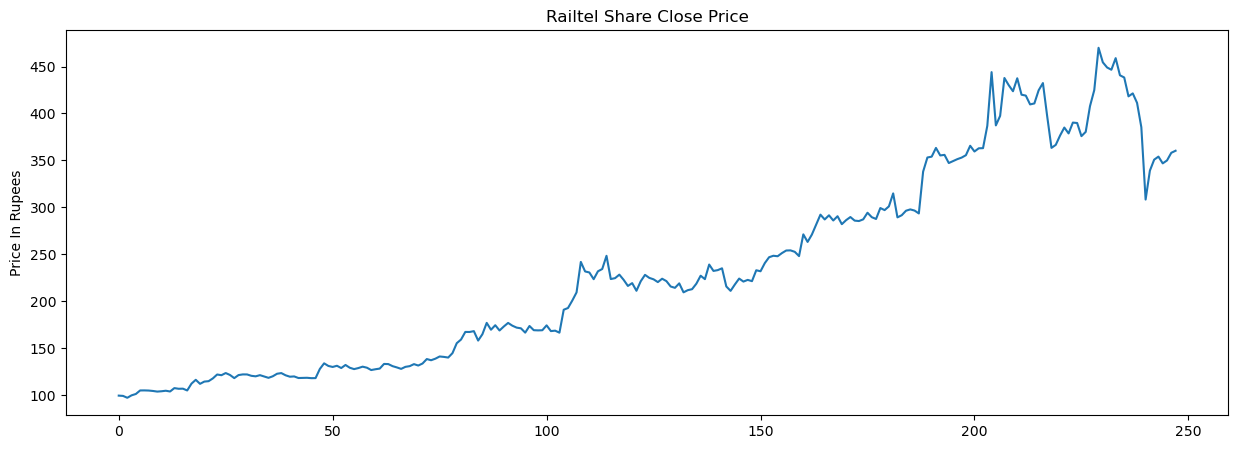

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.title('Railtel Share Close Price',fontsize=12)
plt.ylabel('Price In Rupees')
    

In [7]:
df['Volume']=df['Volume'].str.replace(',','')
#We should remove the comma to convert the data type of the volume column into float

In [8]:
df['Volume']=df['Volume'].astype(float)

In [9]:
df.dtypes

Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
% Change               float64
% Change vs Average    float64
Volume                 float64
dtype: object

C:\Users\Jessica\AppData\Local\Temp\ipykernel_9384\702665920.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


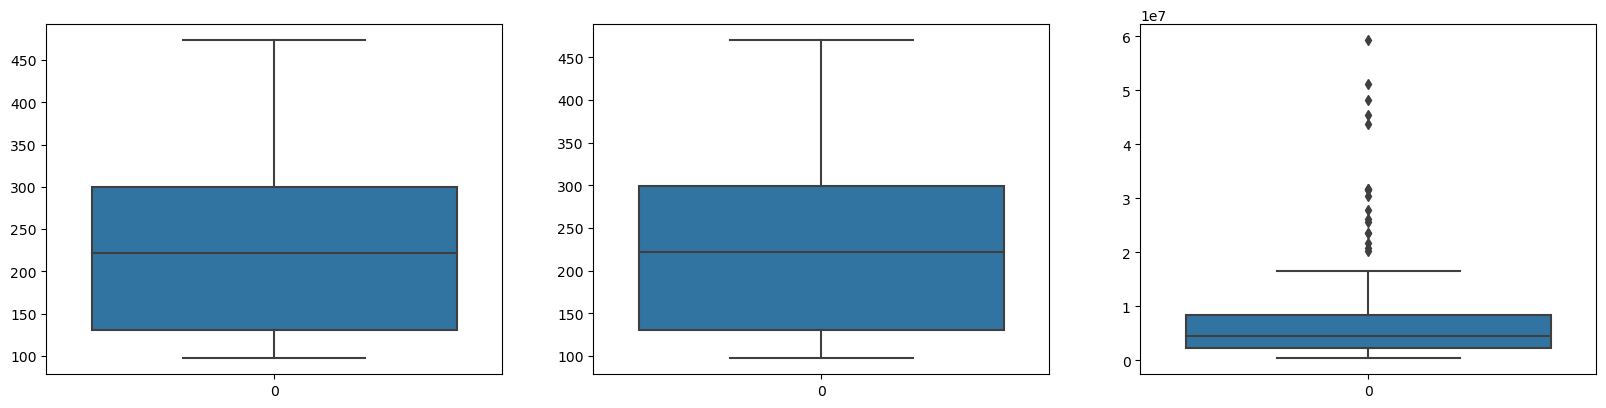

In [10]:
plt.subplots(figsize=(20,10))
a=['Open','Close','Volume']
for i, col in enumerate(a):
 plt.subplot(2,3,i+1)
 sns.boxplot(df[col])
plt.show()


In [11]:
#from datetime import datetime
#df['Date']=pd.to_datetime(df['Date'])
#df['Date']=df['Date'].astype(datetime64)
#sb.regplot(x=to_datetime(df['Date']),y=df['Close'])

In [12]:
df.dtypes

Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
% Change               float64
% Change vs Average    float64
Volume                 float64
dtype: object

In [13]:
split=df['Date'].str.split('-',expand=True)
df['day'] = split[0].astype('float')
df['month'] = split[1].astype('int')
df['year'] = split[2].astype('int')
df.head(3)
# we have seperated the date column in three columns as day,month,year

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume,day,month,year
0,24-03-2023,101.3,101.80,99.00,99.35,-1.39,-1.98,604472.0,24.0,3,2023
1,27-03-2023,99.8,99.90,96.70,99.05,-0.30,-0.89,1205927.0,27.0,3,2023
2,28-03-2023,99.0,99.75,96.25,97.05,-2.02,-2.61,1358690.0,28.0,3,2023


In [14]:
df["is_quater"]=np.where(df['month']%3==0,1,0)
#Now we can seperate the data in quaterly wise to analyze the company performance when the quartely results are published

In [15]:
df.groupby('is_quater').mean()
#prices are higher in the months which are quater end when companred with non quater months
#The volume of trade is also less in quater end months

C:\Users\Jessica\AppData\Local\Temp\ipykernel_9384\316346549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quater').mean()


,Open,High,Low,Close,% Change,% Change vs Average,Volume,day,month,year
is_quater,,,,,,,,,,
0,229.153614,236.372590,223.735542,229.727711,0.770,0.17994,7.437773e+06,15.86747,6.000000,2023.259036
1,242.878659,249.520732,235.906707,241.546951,0.225,-0.36500,6.602905e+06,15.50000,7.426829,2023.195122


In [16]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)
df['target'].value_counts()

1    139
0    109
Name: target, dtype: int64

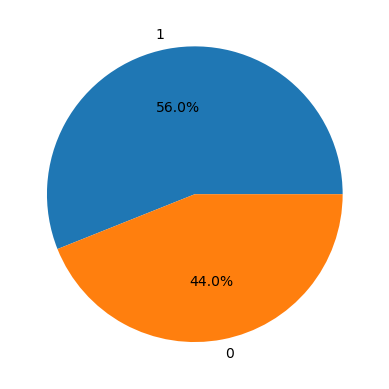

In [17]:
plt.pie(df['target'].value_counts().values,labels=[1,0],autopct='%1.1f%%')
plt.show()

In [18]:
df['days']=range(248)

In [19]:
df[['Open','Close','% Change','Volume','days']].corr()
#Correlation analysis measures the strength of the realtionship between two variables
#The correlation between close and volume is lesser than with days column

,Open,Close,% Change,Volume,days
Open,1.000000,0.993732,-0.076568,0.308018,0.957838
Close,0.993732,1.000000,0.026446,0.352648,0.957348
% Change,-0.076568,0.026446,1.000000,0.474604,-0.024339
Volume,0.308018,0.352648,0.474604,1.000000,0.287858
days,0.957838,0.957348,-0.024339,0.287858,1.000000


#Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [21]:
x=df[['days']]
y=df[['Close']]
lm.fit(x,y)


LinearRegression()

In [22]:
print('Statistical measure of how well the regression line fits the actual data:',lm.score(x,y))


Statistical measure of how well the regression line fits the actual data: 0.9165143869659251


In [23]:
yhat=lm.predict(x)
print('Predicted values',yhat[0:4])
print('Intercept of LM',lm.intercept_)
print('The value of slope',lm.coef_)

Predicted values [[59.16472503]
 [60.57744536]
 [61.99016568]
 [63.40288601]]
Intercept of LM [59.16472503]
The value of slope [[1.41272033]]


<Axes: xlabel='days', ylabel='Close'>

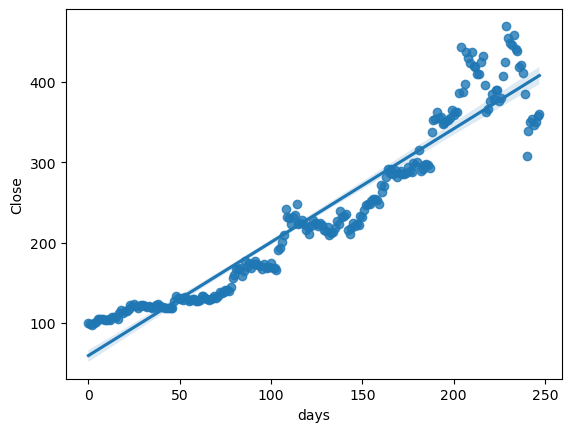

In [24]:
#We have a Positive Linear relationship 
sns.regplot(x='days',y='Close',data=df)

<Axes: xlabel='days', ylabel='Close'>

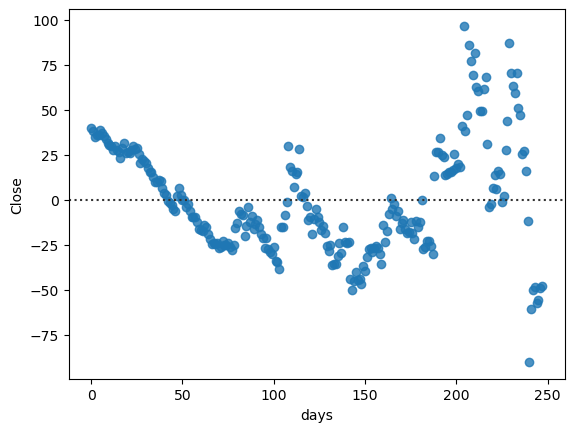

In [25]:
sns.residplot(x=df['days'],y=df['Close'])
#If the plot are scattered randomly across the chart it is termed as good fit for linear regression

In [58]:
 def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1, 250, 250)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Close ~ Days')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of RailTel')

    plt.show()
    plt.close()
  

In [59]:
x=df['days']
y=df['Close']
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)
print(f)

            4             3           2
-5.485e-07 x + 0.0002417 x - 0.02874 x + 1.858 x + 86.62
[-5.48452678e-07  2.41651064e-04 -2.87444557e-02  1.85796882e+00
  8.66169880e+01]


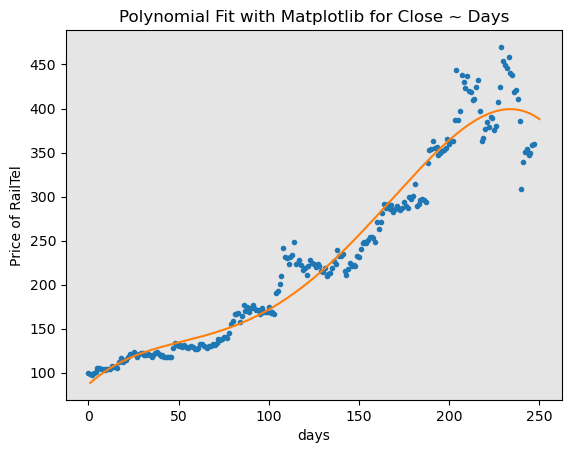

array([-2.92845595e-05,  1.42185849e-02, -4.89146480e-01,  1.15076608e+02])

In [60]:
PlotPolly(p, x , y,'days')
np.polyfit(x, y, 3)
#We can already see from plotting that this polynomial model performs better than the linear model.